# Levich and Koutechy-Levich analysis notebook for CV data.

## 1. Import needed libraries

In [1]:
from pathlib import Path
from ec4py import *
from ec4py import Quantity_Value_Unit as QV

## 2.Make a list of paths to the data files.

In [2]:
paths = []
path_to_dataSetFolder = Path(".").cwd().parent.parent / "test_data" /"Step" / "Rotation"
print(path_to_dataSetFolder)
#paths.append( path_to_dataSetFolder / "CV_144913_ 3.tdms")
paths.append( path_to_dataSetFolder / "Steps_125706.tdms")
paths.append( path_to_dataSetFolder / "Steps_125853.tdms")
paths.append( path_to_dataSetFolder / "Steps_130037.tdms")
paths.append( path_to_dataSetFolder / "Steps_130222.tdms")
paths.append( path_to_dataSetFolder / "Steps_130407.tdms")
paths.append( path_to_dataSetFolder / "Steps_130552.tdms")

print()

c:\Users\gustav.wiberg\Documents\GitHub\NordicEC\EC4py\test_data\Step\Rotation



## 3. Load in the data files

In [3]:
d = Step_Data(paths[1])
ds= Step_Datas(paths)
d.setup


{'Current Range': '10mA',
 'Control Mode': 'WE',
 'Cell Switch': 'TRUE',
 'Step.Type': 'h; h; h; h; h; h; h; h; h; h; h; ',
 'Step.E': '0.750; 0.000; -0.050; -0.100; -0.150; -0.200; -0.250; -0.300; -0.350; -0.400; -0.450; ',
 'Step.Time': '5.000; 10.000; 10.000; 10.000; 10.000; 10.000; 9.000; 10.000; 10.000; 10.000; 10.000; ',
 'Repetitions': '1',
 'Method.Duration': '104.0',
 'Method.Cycle Duration': '104.0',
 'Method.Avg.Time': '0.01',
 'AC Frequency': '5.000E+3 Hz',
 'AC Amplitude': '0.0100 V',
 'Gas': 'Ar',
 'Temp_0': '298.15 K',
 'Temp_1': '298.15 K',
 'Pressure': '100000 Pa',
 'Cell Material': 'Glass',
 'CounterElectrode': 'Pt',
 'Ref.Electrode': 'Ag/AgCl',
 'R.solution': '-1.00 Ohm',
 'IR.compensation': '-1.00 Ohm',
 'Electrolyte1': '0.001 M_NaClO4: H2O_14',
 'Electrolyte2': '_: _',
 'Electrolyte3': '_: _',
 'Electrode.Material': '',
 'Electrode.Tip': '',
 'Electrode.Area': '1.96E-5 m^2',
 'Electrode.ExElectrode': '',
 'Electrode.Cat.Loading': '0.00E+0 g m^-2',
 'Electrode.Cat.W

11
1
[0.75, 0.0, -0.05, -0.1, -0.15, -0.2, -0.25, -0.3, -0.35, -0.4, -0.45] ['h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h']


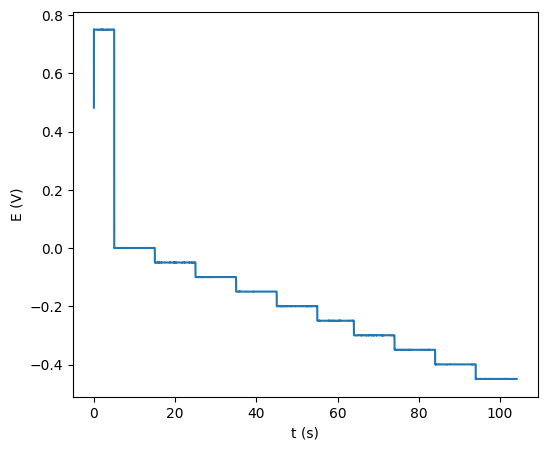

In [4]:
d.plot("Time","E")
print(d.nr_of_steps)
print(d.repetitions)
print(d.step_E,d.step_Type)

{'plot': <Axes: xlabel='t (s)', ylabel='i (A)'>,
 'name': 'Steps_130552',
 'legend': 'Steps_130552'}

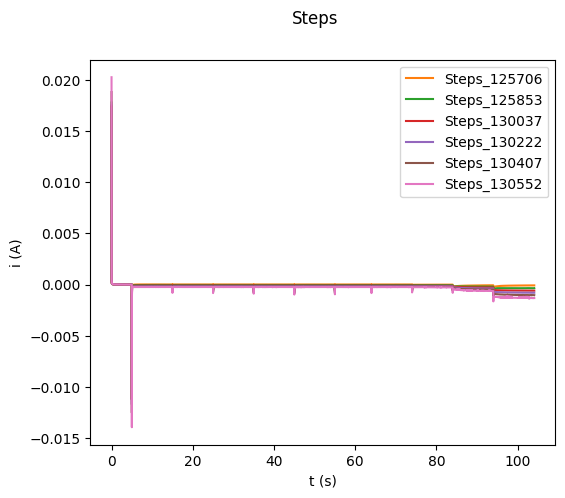

In [5]:
ds.plot()

Levich analysis
 :     	A / rpm^0.5
slope: 	-5.09e-06


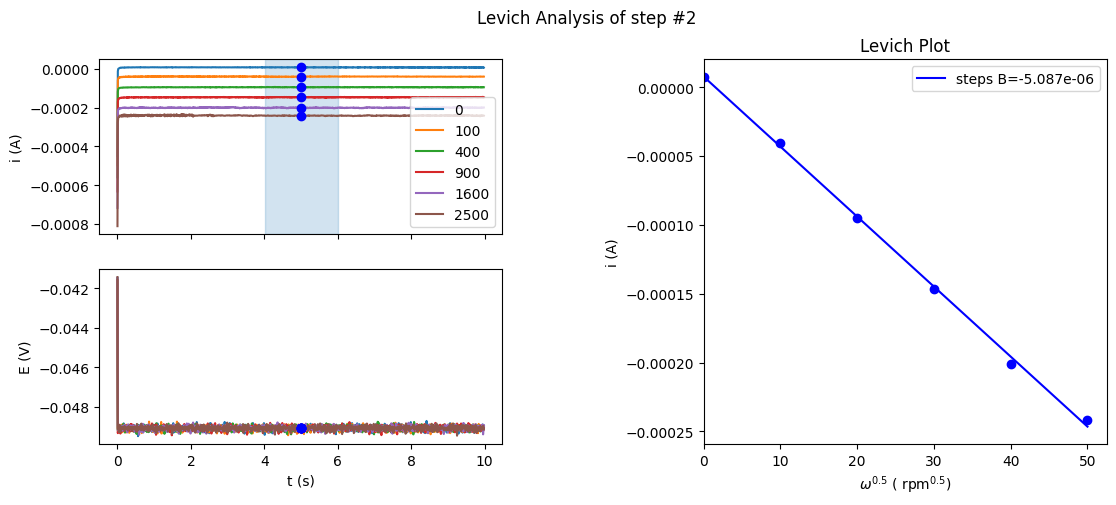

In [6]:
ds.Levich(5,2, dt=2)

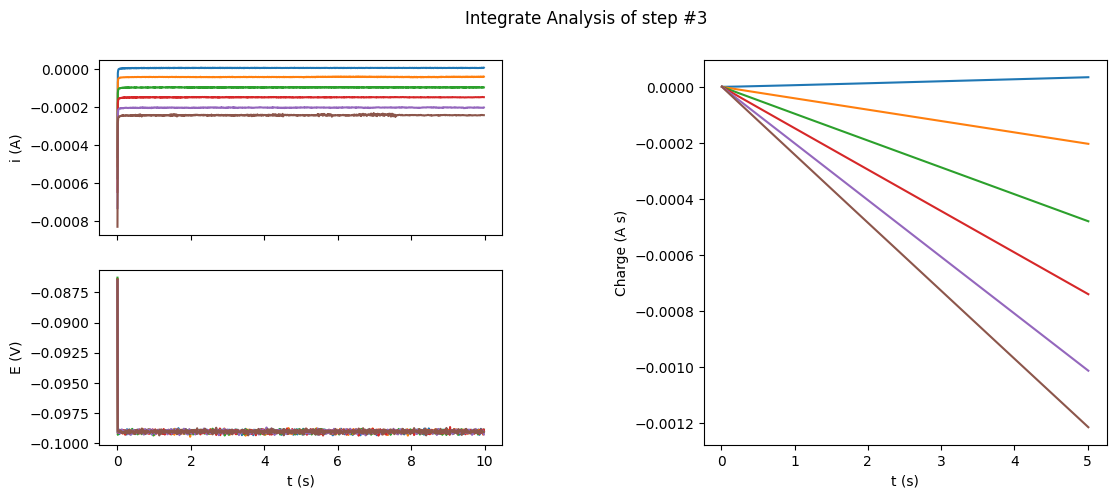

In [7]:
ds.integrate(0,5,3)

6.972e-05 A s
-4.356e-03 A s


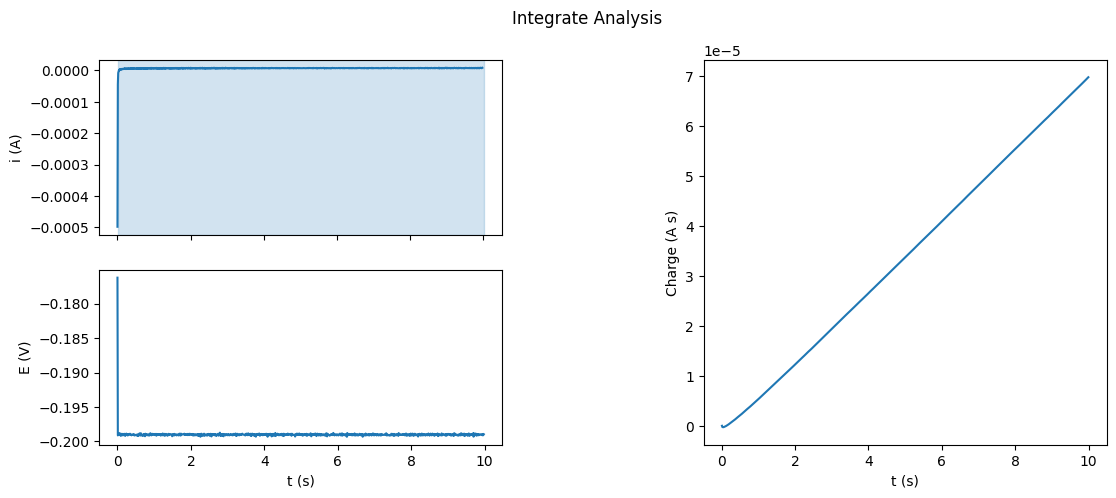

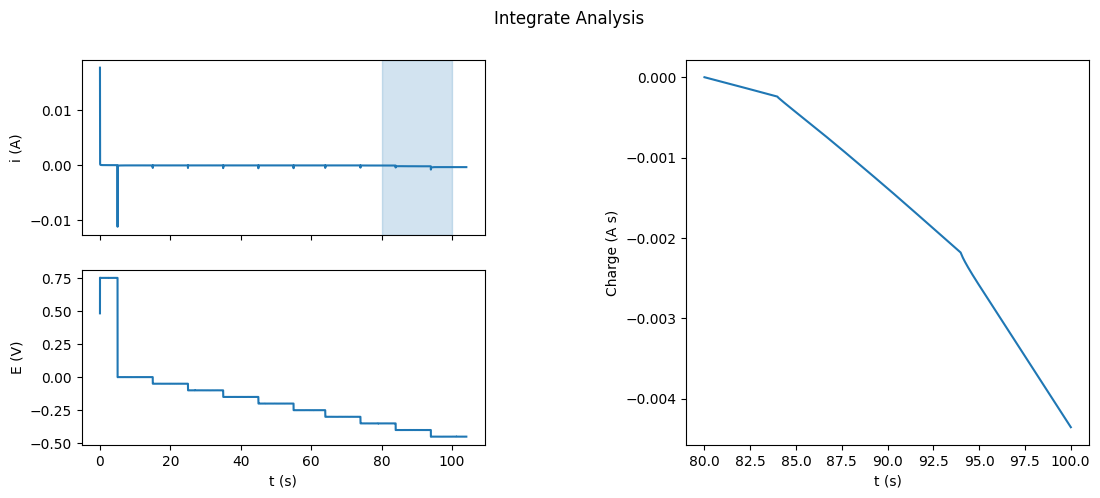

In [8]:
print(ds[0].integrate(0,10,5,norm="area") )
print(ds[1].integrate(80,100))

